In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('max_columns',None)

In [4]:
df = pd.read_csv('Flight_Data_Train.csv')

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.dropna(inplace=True)
print(df.shape)

(10682, 11)


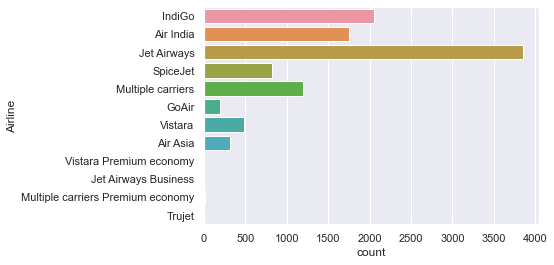

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [9]:
sns.countplot(y=df['Airline'])
plt.show()
print(df['Airline'].value_counts())

In [10]:
# Extracting day and month from "Date_of_Journey"
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey'],dayfirst=True).dt.day

In [11]:
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'], format= "%d/%m/%Y").dt.month

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


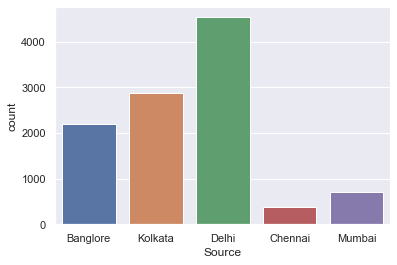

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


In [13]:
sns.countplot(x=df['Source'])
plt.show()
print(df['Source'].value_counts())

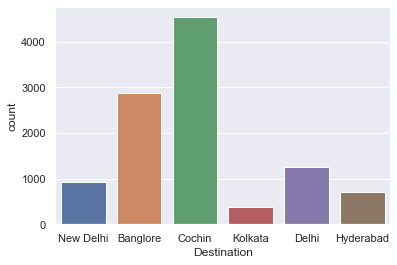

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [14]:
sns.countplot(x=df['Destination'])
plt.show()
print(df['Destination'].value_counts())

In [15]:
# Extracting Departure hours and minutes
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

In [16]:
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [17]:
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

In [18]:
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [19]:
df.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Additional_Info'],inplace=True)

In [20]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [21]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [22]:
df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [23]:
df.drop('Duration', axis=1,inplace=True)

In [24]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35


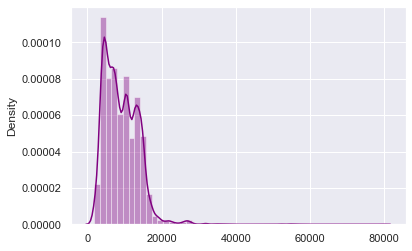

In [25]:
sns.distplot(x=df['Price'],color='purple') # price distribution
plt.show()

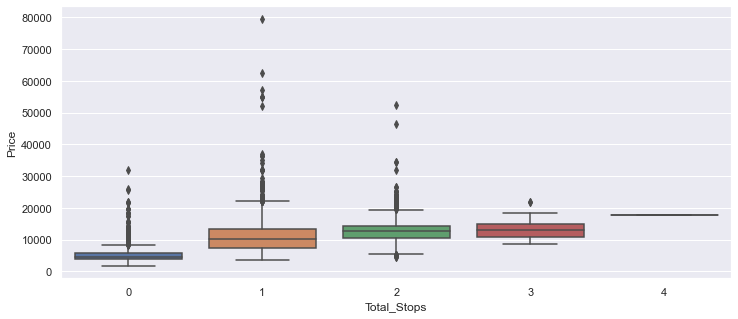

In [26]:
plt.figure(figsize=(12,5))
sns.boxplot(y='Price',x='Total_Stops', data=df) # non-stop flights are cheaper
plt.show()

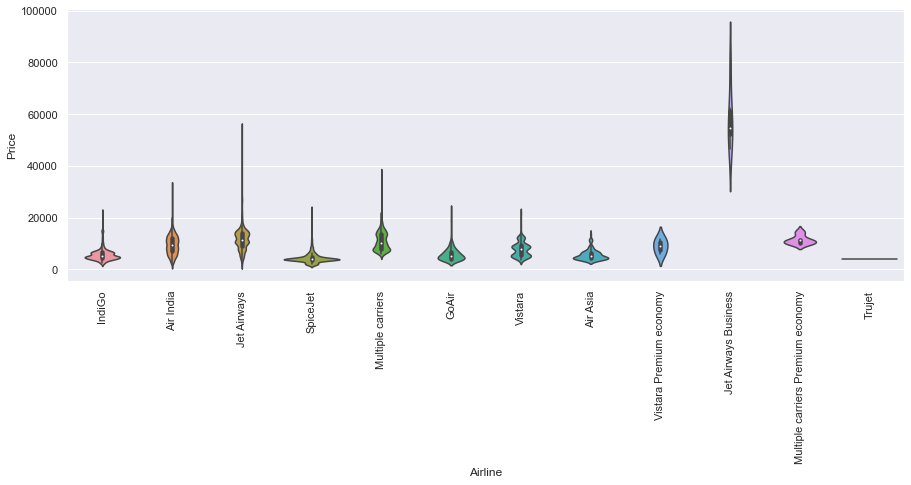

In [27]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=df,) # 'Jet Airways Business' airline is expensive
plt.xticks(rotation=90)
plt.show()

In [28]:
df.corr()['Price']

Total_Stops      0.603897
Price            1.000000
Journey_day     -0.153774
Journey_month   -0.103643
Dep_hour         0.006799
Dep_min         -0.024458
Arrival_hour     0.024244
Arrival_min     -0.086155
Name: Price, dtype: float64

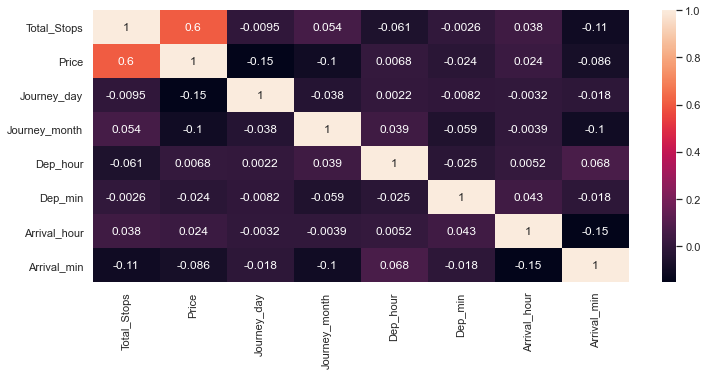

In [29]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True) #Dep_hour,Dep_min,Arrival_hour,Arrival_min is not correlated with target variable
plt.show()

In [30]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35


In [31]:
#import pickle
#pickle.dump(df,open('df.pkl','wb'))

In [32]:
cat_col = []
for i in df.columns:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
cat_col

['Airline', 'Source', 'Destination']

In [33]:
for i in cat_col:
    print(i)
    print(df[i].value_counts())
    print('#'*100)

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
####################################################################################################
Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
####################################################################################################
Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, 

In [34]:
airline = pd.get_dummies(df[['Airline']],drop_first=True) #encoding

In [35]:
source = pd.get_dummies(df[['Source']],drop_first=True)

In [36]:
destination = pd.get_dummies(df[['Destination']],drop_first=True)

In [37]:
df1 = df.copy()

In [38]:
df1.drop(columns=['Dep_hour','Dep_min','Arrival_hour','Arrival_min'],inplace=True)

In [39]:
df1 = pd.concat([df1,airline,source,destination],axis=1)

In [40]:
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
df1.drop(columns=['Airline','Source','Destination'],inplace=True)

In [42]:
df1.head()

,Total_Stops,Price,Journey_day,Journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
df1 = df1.rename({'Airline_Air India':'Airline_AirIndia','Airline_Jet Airways':'Airline_JetAirways','Airline_Jet Airways Business':'Airline_JetAirwaysBusiness',
           'Airline_Multiple carriers':'Airline_MultipleCarriers','Airline_Multiple carriers Premium economy':'Airline_MultipleCarriersPremiumeconomy',
           'Airline_Vistara Premium economy':'Airline_VistaraPremiumEconomy','Destination_New Delhi':'Destination_NewDelhi'},axis=1)

In [44]:
X = df1.drop('Price',axis=1)

In [45]:
y = df1['Price']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [49]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
print('Training score')
print('r2 score: ', r2_score(y_train,y_pred))
print('mse: ', mean_squared_error(y_train,y_pred))
print('mae: ', mean_absolute_error(y_train,y_pred))
print('-'*100)
y_pred1 = lr.predict(X_test)
print('Testing score')
print('r2 score: ', r2_score(y_test,y_pred1))
print('mse: ', mean_squared_error(y_test,y_pred1))
print('mae: ', mean_absolute_error(y_test,y_pred1))

Training score
r2 score:  0.6263828824921285
mse:  7850657.266944034
mae:  1949.0083343837998
----------------------------------------------------------------------------------------------------
Testing score
r2 score:  0.6055170422370288
mse:  8774529.459811402
mae:  1980.7155976923402


In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_train)
print('Training score')
print('r2 score: ', r2_score(y_train,y_pred))
print('mse: ', mean_squared_error(y_train,y_pred))
print('mae: ', mean_absolute_error(y_train,y_pred))
print('-'*100)
y_pred1 = rf.predict(X_test)
print('Testing score')
print('r2 score: ', r2_score(y_test,y_pred1))
print('mse: ', mean_squared_error(y_test,y_pred1))
print('mae: ', mean_absolute_error(y_test,y_pred1))

Training score
r2 score:  0.8257464526047286
mse:  3661515.5303226775
mae:  1241.7495121605666
----------------------------------------------------------------------------------------------------
Testing score
r2 score:  0.7888291599008579
mse:  4697097.101508738
mae:  1413.7882013267254


In [52]:
from sklearn.ensemble import ExtraTreesRegressor

In [53]:
et = ExtraTreesRegressor()
et.fit(X_train,y_train)
y_pred = et.predict(X_train)
print('Training score')
print('r2 score: ', r2_score(y_train,y_pred))
print('mse: ', mean_squared_error(y_train,y_pred))
print('mae: ', mean_absolute_error(y_train,y_pred))
print('-'*100)
y_pred1 = et.predict(X_test)
print('Testing score')
print('r2 score: ', r2_score(y_test,y_pred1))
print('mse: ', mean_squared_error(y_test,y_pred1))
print('mae: ', mean_absolute_error(y_test,y_pred1))

Training score
r2 score:  0.8277916809335367
mse:  3618540.0190580483
mae:  1222.7483684389817
----------------------------------------------------------------------------------------------------
Testing score
r2 score:  0.7789649714564093
mse:  4916507.371077216
mae:  1418.3088439112885


In [54]:
from xgboost import XGBRegressor

In [55]:
xg = XGBRegressor()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_train)
print('Training score')
print('r2 score: ', r2_score(y_train,y_pred))
print('mse: ', mean_squared_error(y_train,y_pred))
print('mae: ', mean_absolute_error(y_train,y_pred))
print('-'*100)
y_pred1 = xg.predict(X_test)
print('Testing score')
print('r2 score: ', r2_score(y_test,y_pred1))
print('mse: ', mean_squared_error(y_test,y_pred1))
print('mae: ', mean_absolute_error(y_test,y_pred1))

Training score
r2 score:  0.8225914497124212
mse:  3727810.261540931
mae:  1276.9319411936806
----------------------------------------------------------------------------------------------------
Testing score
r2 score:  0.7952310484762031
mse:  4554699.163150778
mae:  1407.2723197312237


In [56]:
#xg.save_model('model1.txt')

In [57]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))

In [58]:
# for app.py

In [59]:
df1.head()

,Total_Stops,Price,Journey_day,Journey_month,Airline_AirIndia,Airline_GoAir,Airline_IndiGo,Airline_JetAirways,Airline_JetAirwaysBusiness,Airline_MultipleCarriers,Airline_MultipleCarriersPremiumeconomy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_VistaraPremiumEconomy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_NewDelhi
0,0,3897,24,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [60]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [61]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [62]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [63]:
air = []
for i in df['Airline'].unique():
    air.append(i)
air

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Vistara Premium economy',
 'Jet Airways Business',
 'Multiple carriers Premium economy',
 'Trujet']

In [64]:
X_train.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Airline_AirIndia',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_JetAirways',
       'Airline_JetAirwaysBusiness', 'Airline_MultipleCarriers',
       'Airline_MultipleCarriersPremiumeconomy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_VistaraPremiumEconomy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_NewDelhi'],
      dtype='object')

In [65]:
X_train.Total_Stops.value_counts()

1    4468
0    2816
2    1221
3      39
4       1
Name: Total_Stops, dtype: int64

In [66]:
rf.predict([[0,12,4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0]])

array([5117.34680952])